In [21]:
import lib
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn.model_selection import train_test_split

Xc_train, yc_train, Xc_test, yc_test = lib.load_dataset("../dataset_clusterified")
Xc_train, Xc_val, yc_train, yc_val = train_test_split(Xc_train, yc_train, test_size=0.2, random_state=42)

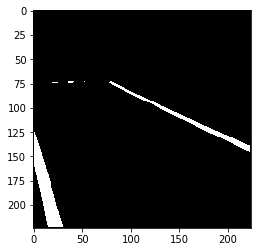

In [23]:
plt.imshow(Xc_val[0])

In [34]:
import cv2
from skimage.feature import hog
from xgboost import XGBRegressor

class HoGClusterEstimator(lib.Estimator):
    def __init__(
        self,
        orientations=8,
        ppc=16,
        cpb=1,
        classifier=XGBRegressor
    ):
        self.orientations = orientations
        self.ppc = ppc
        self.cpb = cpb
        self.classifier = classifier()
        
    def fit(self, X, y):
        feats = [ self._hog(x) for x in X]
        self.classifier.fit(feats, y)

    def _hog(self, img):
        return hog(
            img,
            orientations=self.orientations, 
            pixels_per_cell=(self.ppc, self.ppc),
            cells_per_block=(self.cpb, self.cpb),
        )
        
    def predict_one(self, img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gradients = self._hog(img)
        return self.classifier.predict([gradients])[0]

In [35]:
import time

for orientations in [
    4,
    8,
    16
]:
    for ppc in [16, 24, 32, 64]:
        for cpb in [1, 2, 3]:
            s = time.time()
            estimator = HoGClusterEstimator(orientations=orientations, ppc=ppc, cpb=cpb)
            estimator.fit(Xc_train, yc_train)
            
            score = estimator.score(Xc_val, yc_val)
            
            print(f"score: {score}, took: {time.time() -s} seconds, o: {orientations}, ppc: {ppc}, cpb: {cpb}")

[13:15:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
score: (0.10309505240576423, 0.23895277200577833), took: 73.70130157470703 seconds, o: 4, ppc: 16, cpb: 1
[13:16:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
score: (0.09928644129226988, 0.23340757713529914), took: 89.18835139274597 seconds, o: 4, ppc: 16, cpb: 2
[13:17:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
score: (0.09126505995336197, 0.22155155704362794), took: 110.11738657951355 seconds, o: 4, ppc: 16, cpb: 3
[13:19:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
score: (0.09229162151544344, 0.2273283656791596), took: 56.5496506690979 seconds, o: 4, ppc: 24, cpb: 1
[13:20:28] WARNING: /workspace/src/objective/regression_obj.cu:152: r

In [18]:
yc_pred = [estimator.predict_one(x) for x in Xc_val]

(array([ 81.,  98.,  75., 147., 149.,  94.,  67.,  77.,  98.,  36.]),
 array([-1.0542804 , -0.8306734 , -0.60706633, -0.38345933, -0.1598523 ,
         0.06375474,  0.28736177,  0.5109688 ,  0.7345758 ,  0.9581829 ,
         1.1817899 ], dtype=float32),
 <a list of 10 Patch objects>)

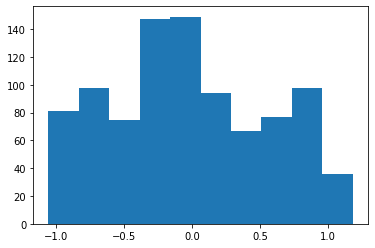

In [19]:
plt.hist(yc_pred)

(array([182.,  71.,  52.,  34., 140., 124.,  57.,  27.,  42., 193.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

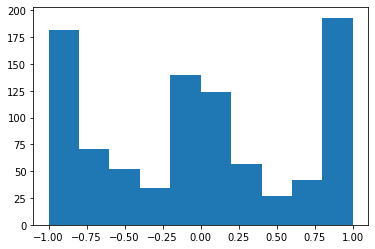

In [20]:
plt.hist(yc_val)